In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [2]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights'
# loading up our datasets
train_data_dir = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Train' 
validation_data_dir = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Validation' 
test_data_dir = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Test'
 
# number of epochs to train top model 
epochs = 25 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 32

In [3]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

## Making Dataset Features

In [8]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights\bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 12614 images belonging to 2 classes.


C:\Users\hafiz\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:50:30.408694


In [9]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test) 
 
np.save(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights\bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 946 images belonging to 2 classes.
Time:  0:03:37.543985


In [10]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation) 
 
np.save(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights\bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 946 images belonging to 2 classes.
Time:  0:03:47.983770


## Loading of Features

In [4]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights\bottleneck_features_train.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 12614 images belonging to 2 classes.


In [5]:
#training data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_test_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights\bottleneck_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 946 images belonging to 2 classes.


In [6]:
#training data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_validation_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\VGG16_Weights\bottleneck_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 946 images belonging to 2 classes.


In [7]:
from tensorflow.keras import optimizers
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(learning_rate=1e-4),
   metrics=['acc'])
history = model.fit(train_data, train_labels, 
   epochs=50,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/50
395/395 [==============================] - 10s 23ms/step - loss: 0.7308 - acc: 0.5910 - val_loss: 0.6157 - val_acc: 0.6395
Epoch 2/50
395/395 [==============================] - 9s 24ms/step - loss: 0.6641 - acc: 0.6372 - val_loss: 0.6396 - val_acc: 0.6364
Epoch 3/50
395/395 [==============================] - 10s 25ms/step - loss: 0.6402 - acc: 0.6569 - val_loss: 0.5040 - val_acc: 0.7252
Epoch 4/50
395/395 [==============================] - 10s 25ms/step - loss: 0.6188 - acc: 0.6718 - val_loss: 0.5430 - val_acc: 0.7008
Epoch 5/50
395/395 [==============================] - 10s 24ms/step - loss: 0.5949 - acc: 0.6943 - val_loss: 0.4983 - val_acc: 0.7526
Epoch 6/50
395/395 [==============================] - 9s 24ms/step - loss: 0.5882 - acc: 0.7027 - val_loss: 0.4684 - val_acc: 0.7875
Epoch 7/50
395/395 [==============================] - 10s 24ms/step - loss: 0.5800 - acc: 0.7066 - val_loss: 0.5636 - val_acc: 0.6723
Epoch 8/50
395/395 [==============================] - 10s 24ms/s

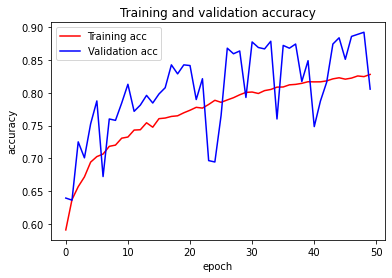

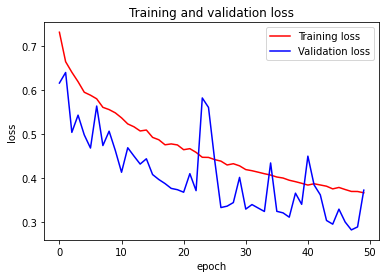

In [8]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [9]:
print(len(test_data))
print(len(test_labels))
model.evaluate(test_data, test_labels)

946
946
30/30 [==============================] - 0s 5ms/step - loss: 0.2640 - acc: 0.9133


[0.26401641964912415, 0.9133192300796509]

In [10]:
preds = np.round(model.predict(test_data), 0)
print('rounded test labels: ', preds)

rounded test labels:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
classes = ['Authentic_Image', 'Tempered_Image']
classification_metrics = metrics.classification_report(test_labels, preds, target_names = classes)
print(classification_metrics)

                 precision    recall  f1-score   support

Authentic_Image       0.97      0.88      0.92       562
 Tempered_Image       0.84      0.97      0.90       384

      micro avg       0.91      0.91      0.91       946
      macro avg       0.91      0.92      0.91       946
   weighted avg       0.92      0.91      0.91       946
    samples avg       0.91      0.91      0.91       946



In [12]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Normalized confusion matrix


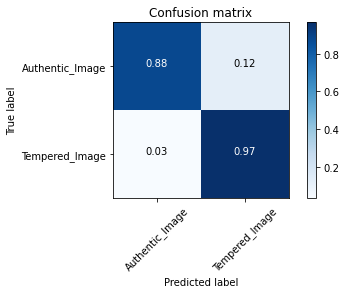

In [13]:
plot_confusion_matrix(confusion_matrix, ['Authentic_Image', 'Tempered_Image'], normalize = True)

## Test Image 1

[INFO] loading and preprocessing image…
ID: 0, Label: Authentic_Image 2.93%
ID: 1, Label: Tempered_Image 97.07%
Final Decision:
Given Image is Tempered:  97.07
.
..
...


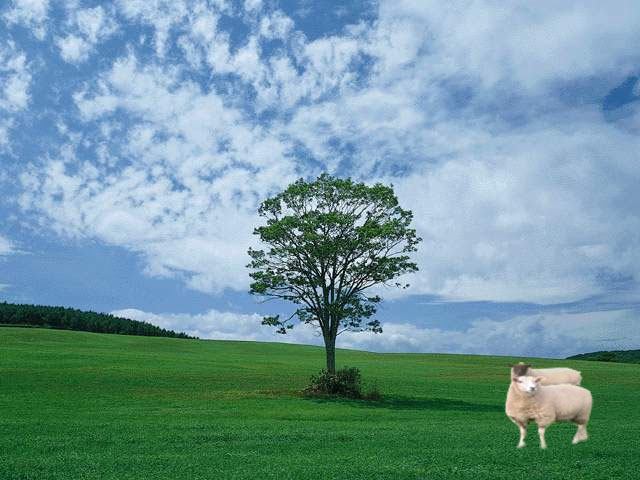

In [14]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    classes = ['Authentic_Image', 'Tempered_Image']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict(bt_prediction)
    predictions = {}
    for idx, classs, x in zip(range(0,6), classes , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, classs, round(x*100,2) ))
        predictions.update({classs:round(x*100,2)})
    print('Final Decision:')
    time.sleep(.5)
    if predictions['Authentic_Image'] > predictions['Tempered_Image']:
        print('Given Image is Authentic: ', predictions['Authentic_Image'])
    else:
        print('Given Image is Tempered: ', predictions['Tempered_Image'])
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    return load_img(path)
path = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset\Tempered_Images\Tp_D_CNN_S_N_nat10156_ani00097_12022.jpg'
test_single_image(path)

## Tempered Image

Tempered part of the image: ... 


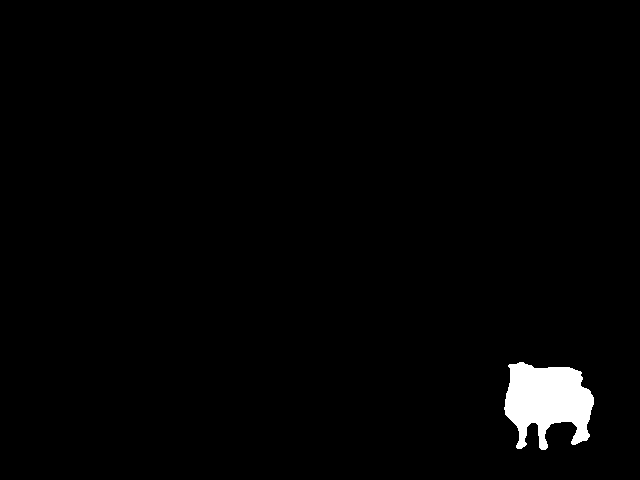

In [15]:

file_path = r"C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset\Groundtruth_Images\Tp_D_CNN_S_N_nat10156_ani00097_12022_gt.png"
print("Tempered part of the image: ... ")
load_img(file_path)

## Localization of Tempered Part

Localization of Tempered Part: ... 


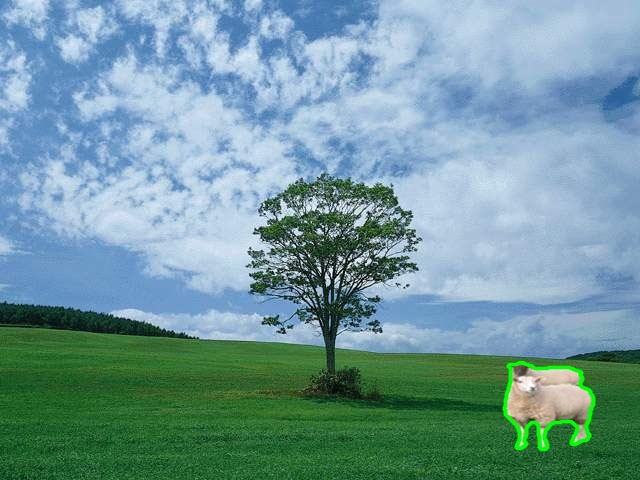

In [16]:
import cv2
 
# read the image
image = cv2.imread(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset\Groundtruth_Images\Tp_D_CNN_S_N_nat10156_ani00097_12022_gt.png')

# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = cv2.imread(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset\Tempered_Images\Tp_D_CNN_S_N_nat10156_ani00097_12022.jpg')
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

cv2.imwrite('localized_image.jpg', image_copy)

file_path = r"C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\localized_image.jpg"
print("Localization of Tempered Part: ... ")
load_img(file_path)

## Test Image 2

[INFO] loading and preprocessing image…
ID: 0, Label: Authentic_Image 85.49%
ID: 1, Label: Tempered_Image 14.51%
Final Decision:
Given Image is Authentic:  85.49
.
..
...


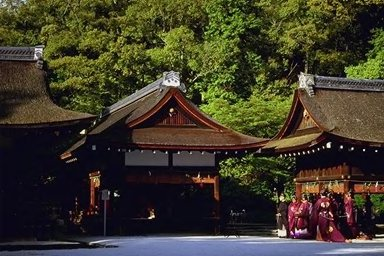

In [18]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    classes = ['Authentic_Image', 'Tempered_Image']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict(bt_prediction)
    predictions = {}
    for idx, classs, x in zip(range(0,6), classes , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, classs, round(x*100,2) ))
        predictions.update({classs:round(x*100,2)})
    print('Final Decision:')
    time.sleep(.5)
    if predictions['Authentic_Image'] > predictions['Tempered_Image']:
        print('Given Image is Authentic: ', predictions['Authentic_Image'])
    else:
        print('Given Image is Tempered: ', predictions['Tempered_Image'])
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    return load_img(path)
path = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Test\Authentic_Images\Au_sec_30319.jpg'
test_single_image(path)

## Test Image 3

[INFO] loading and preprocessing image…
ID: 0, Label: Authentic_Image 2.77%
ID: 1, Label: Tempered_Image 97.23%
Final Decision:
Given Image is Tempered:  97.23
.
..
...


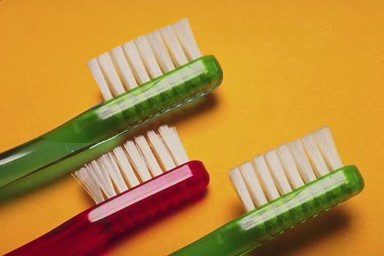

In [19]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    classes = ['Authentic_Image', 'Tempered_Image']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict(bt_prediction)
    predictions = {}
    for idx, classs, x in zip(range(0,6), classes , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, classs, round(x*100,2) ))
        predictions.update({classs:round(x*100,2)})
    print('Final Decision:')
    time.sleep(.5)
    if predictions['Authentic_Image'] > predictions['Tempered_Image']:
        print('Given Image is Authentic: ', predictions['Authentic_Image'])
    else:
        print('Given Image is Tempered: ', predictions['Tempered_Image'])
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    return load_img(path)
path = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Test\Tempered_Images\Tp_S_NRN_S_N_art00019_art00019_10275.tif'
test_single_image(path)

Tempered part of the image: ... 


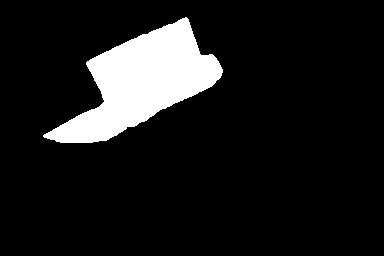

In [20]:
file_path = r"C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset\Groundtruth_Images\Tp_S_NRN_S_N_art00019_art00019_10275_gt.png"
print("Tempered part of the image: ... ")
load_img(file_path)

Localization of Tempered Part: ... 


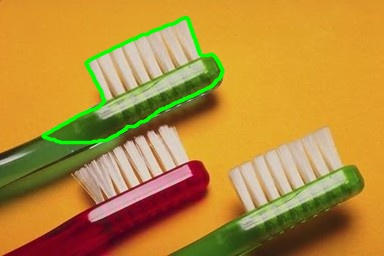

In [21]:
import cv2
 
# read the image
image = cv2.imread(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset\Groundtruth_Images\Tp_S_NRN_S_N_art00019_art00019_10275_gt.png')

# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = cv2.imread(r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Test\Tempered_Images\Tp_S_NRN_S_N_art00019_art00019_10275.tif')
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

cv2.imwrite('localized_image.jpg', image_copy)

file_path = r"C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\localized_image.jpg"
print("Localization of Tempered Part: ... ")
load_img(file_path)

## Test Image 4

[INFO] loading and preprocessing image…
ID: 0, Label: Authentic_Image 99.87%
ID: 1, Label: Tempered_Image 0.13%
Final Decision:
Given Image is Authentic:  99.87
.
..
...


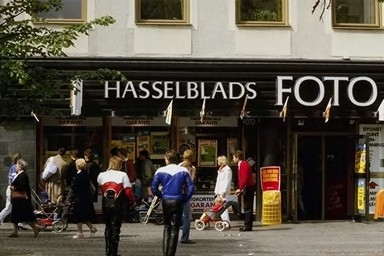

In [23]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    classes = ['Authentic_Image', 'Tempered_Image']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict(bt_prediction)
    predictions = {}
    for idx, classs, x in zip(range(0,6), classes , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, classs, round(x*100,2) ))
        predictions.update({classs:round(x*100,2)})
    print('Final Decision:')
    time.sleep(.5)
    if predictions['Authentic_Image'] > predictions['Tempered_Image']:
        print('Given Image is Authentic: ', predictions['Authentic_Image'])
    else:
        print('Given Image is Tempered: ', predictions['Tempered_Image'])
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    return load_img(path)
path = r'C:\Users\hafiz\tempered_image_detection_and_localization_project\VGG16_Model_Implementation\Casia_Dataset_Splitted_For_Training\Test\Authentic_Images\Au_sec_30609.jpg'
test_single_image(path)